In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('../../data/processed/SalesRevenueProcessed.csv')
df.head()

,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Toys,Region_North,Region_South,Region_West,CustomerSegment_Low Income,CustomerSegment_Middle Income,SalesRevenue
0,1.028403,0.369698,-0.235802,0.022636,-0.970258,0.88176,2.414633,0.114937,-0.596601,1.753089,-0.570422,-0.585819,-0.589668,-0.582739,-0.73622,-0.678911,2293.143707
1,-0.972381,-1.492378,1.085554,0.022636,2.059882,0.88176,0.223070,-0.472621,-0.596601,-0.570422,1.753089,-0.585819,-0.589668,1.716034,-0.73622,-0.678911,1640.454368
2,-0.972381,1.199536,1.526006,0.022636,0.784033,0.88176,-1.185792,-0.161561,1.676163,-0.570422,-0.570422,-0.585819,1.695868,-0.582739,-0.73622,-0.678911,2173.086023
3,1.028403,-1.623937,-0.956541,0.022636,-1.105204,0.88176,1.475392,-1.163866,-0.596601,1.753089,-0.570422,-0.585819,-0.589668,1.716034,-0.73622,1.472947,1672.608857
4,1.028403,-0.227381,-0.916500,1.763858,-0.307798,0.88176,0.588330,0.425997,-0.596601,1.753089,-0.570422,-0.585819,-0.589668,1.716034,-0.73622,1.472947,2443.222482


In [6]:
X = df.drop(columns=["SalesRevenue"])
y = df["SalesRevenue"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"(X) Trainning Shape: {X_train.shape}")
print(f"(X) Test Shape: {X_test.shape}")

(X) Trainning Shape: (1600, 16)
(X) Test Shape: (400, 16)



=== XGBoost TRAIN ===
MAE Train: 59.6328
MSE Train: 5788.6876
MAPE Train: 0.0297
R² Train: 0.9516

=== XGBoost TEST ===
MAE Test: 92.0911
RMSE Test: 114.7420
MAPE Test: 0.0459
R² Test: 0.8904


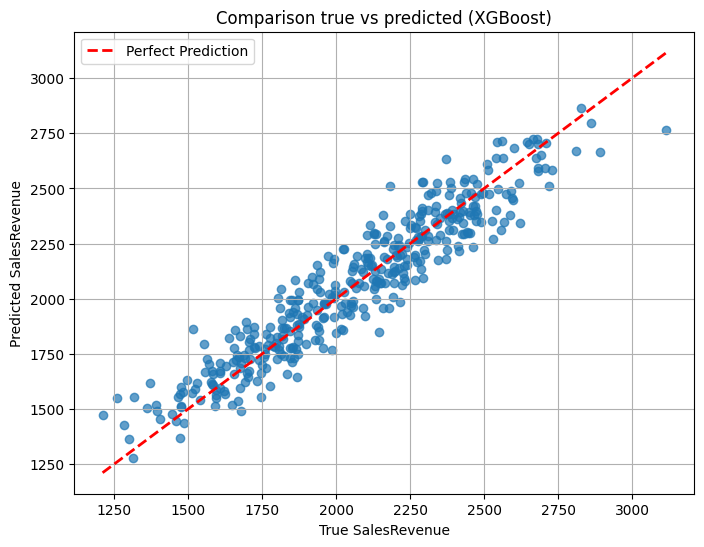

In [7]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0
)

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_pred)
mse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mape_test = mean_absolute_percentage_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("\n=== XGBoost TRAIN ===")
print(f"MAE Train: {mae_train:.4f}")
print(f"MSE Train: {mse_train:.4f}")
print(f"MAPE Train: {mape_train:.4f}")
print(f"R² Train: {r2_train:.4f}")

print("\n=== XGBoost TEST ===")
print(f"MAE Test: {mae_test:.4f}")
print(f"RMSE Test: {mse_test:.4f}")
print(f"MAPE Test: {mape_test:.4f}")
print(f"R² Test: {r2_test:.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel("True SalesRevenue")
plt.ylabel("Predicted SalesRevenue")
plt.title("Comparison true vs predicted (XGBoost)")
plt.legend()
plt.grid(True)
plt.show()